In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import numpy as np 

In [3]:
data = pd.read_csv("data_analys.csv")

In [4]:
1 == 1

True

In [5]:
data

,Unnamed: 0,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,...,product_width_cm,date_achat,date_initial,diff_days,dummy,score_freq,price_y,score_rec,score_montant,score_rfm
0,0,08c5351a6aca1c1589a38f244edeee9d,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,2e7a8482f6fb09756ca50c10d7bfc047,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,...,28.0,2016-09-04,2016-09-04,0.0,1,1,72.89,1,3,5
1,1,08c5351a6aca1c1589a38f244edeee9d,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,2e7a8482f6fb09756ca50c10d7bfc047,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,...,28.0,2016-09-04,2016-09-04,0.0,1,1,72.89,1,3,5
2,2,683c54fc24d40ee9f8a6fc179fd9856c,4854e9b3feff728c13ee5fc7d1547e92,99025,passo fundo,RS,e5fa5a7210941f7d56d0208e4e071d35,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,...,25.0,2016-09-05,2016-09-04,1.0,1,1,59.50,1,2,4
3,3,86dc2ffce2dfff336de2f386a786e574,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,...,16.0,2016-09-15,2016-09-04,11.0,1,1,134.97,1,4,6
4,4,86dc2ffce2dfff336de2f386a786e574,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,...,16.0,2016-09-15,2016-09-04,11.0,1,1,134.97,1,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112367,112367,448945bc713d98b6726e82eda6249b9e,afbcfd0b9c5233e7ccc73428526fbb52,12243,sao jose dos campos,SP,bee12e8653a04e76786e8891cfb6330a,delivered,2018-08-29 08:46:11,2018-08-29 09:04:10,...,15.0,2018-08-29,2016-09-04,724.0,1,1,457.75,5,5,11
112368,112368,e60df9449653a95af4549bbfcb18a6eb,5c58de6fb80e93396e2f35642666b693,80045,curitiba,PR,0b223d92c27432930dfe407c6aea3041,delivered,2018-08-29 14:18:23,2018-08-29 14:31:07,...,49.0,2018-08-29,2016-09-04,724.0,1,1,418.00,5,5,11
112369,112369,448945bc713d98b6726e82eda6249b9e,afbcfd0b9c5233e7ccc73428526fbb52,12243,sao jose dos campos,SP,bee12e8653a04e76786e8891cfb6330a,delivered,2018-08-29 08:46:11,2018-08-29 09:04:10,...,15.0,2018-08-29,2016-09-04,724.0,1,1,457.75,5,5,11
112370,112370,448945bc713d98b6726e82eda6249b9e,afbcfd0b9c5233e7ccc73428526fbb52,12243,sao jose dos campos,SP,bee12e8653a04e76786e8891cfb6330a,delivered,2018-08-29 08:46:11,2018-08-29 09:04:10,...,15.0,2018-08-29,2016-09-04,724.0,1,1,457.75,5,5,11


In [6]:
from sklearn.cluster import KMeans
import pandas as pd

# Define the number of clusters
n_clusters = 3

# Use only the RFM score for clustering
X = data[["score_rfm"]].values

# Initialize the k-means model
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to the data frame as a new column
data["cluster"] = labels

# Group the data by cluster to see the statistics for each cluster
grouped = data.groupby("cluster").agg({"score_rfm": "mean"})

# Print the statistics for each cluster
print(grouped)


/home/apprenant/miniconda3/envs/potages/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


         score_rfm
cluster           
0         4.325992
1         9.760082
2         7.034401


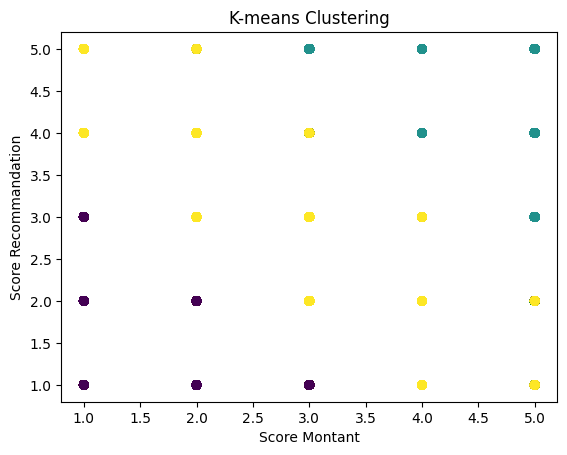

In [7]:
import matplotlib.pyplot as plt

plt.scatter(data["score_montant"], data["score_rec"], c=kmeans.labels_)
plt.xlabel("Score Montant")
plt.ylabel("Score Recommandation")
plt.title("K-means Clustering")
plt.show()


In [8]:
""" from sklearn.metrics import silhouette_score

silhouette_score = silhouette_score(data[["score_montant", "score_rec"]], kmeans.labels_)
print("Silhouette Score:", silhouette_score) """


' from sklearn.metrics import silhouette_score\n\nsilhouette_score = silhouette_score(data[["score_montant", "score_rec"]], kmeans.labels_)\nprint("Silhouette Score:", silhouette_score) '

/home/apprenant/miniconda3/envs/potages/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


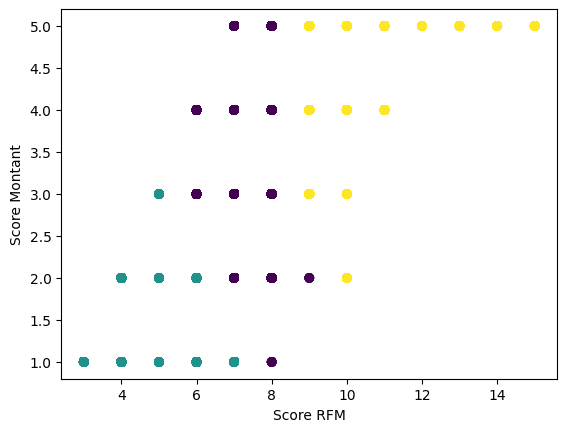

In [9]:
import matplotlib.pyplot as plt

# Fit the KMeans model
kmeans = KMeans(n_clusters=3)
kmeans.fit(data[["score_rfm", "score_montant"]])

# Get the cluster assignments for each data point
cluster_assignments = kmeans.labels_

# Plot the data points, coloring each one based on its cluster assignment
plt.scatter(data["score_rfm"], data["score_montant"], c=cluster_assignments)
plt.xlabel("Score RFM")
plt.ylabel("Score Montant")
plt.show()


In [10]:
data.columns

Index(['Unnamed: 0', 'customer_id', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price_x', 'freight_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'date_achat', 'date_initial', 'diff_days', 'dummy', 'score_freq',
       'price_y', 'score_rec', 'score_montant', 'score_rfm', 'cluster'],
      dtype='object')

In [11]:
data

,Unnamed: 0,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,...,date_achat,date_initial,diff_days,dummy,score_freq,price_y,score_rec,score_montant,score_rfm,cluster
0,0,08c5351a6aca1c1589a38f244edeee9d,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,2e7a8482f6fb09756ca50c10d7bfc047,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,...,2016-09-04,2016-09-04,0.0,1,1,72.89,1,3,5,0
1,1,08c5351a6aca1c1589a38f244edeee9d,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,2e7a8482f6fb09756ca50c10d7bfc047,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,...,2016-09-04,2016-09-04,0.0,1,1,72.89,1,3,5,0
2,2,683c54fc24d40ee9f8a6fc179fd9856c,4854e9b3feff728c13ee5fc7d1547e92,99025,passo fundo,RS,e5fa5a7210941f7d56d0208e4e071d35,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,...,2016-09-05,2016-09-04,1.0,1,1,59.50,1,2,4,0
3,3,86dc2ffce2dfff336de2f386a786e574,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,...,2016-09-15,2016-09-04,11.0,1,1,134.97,1,4,6,2
4,4,86dc2ffce2dfff336de2f386a786e574,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,...,2016-09-15,2016-09-04,11.0,1,1,134.97,1,4,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112367,112367,448945bc713d98b6726e82eda6249b9e,afbcfd0b9c5233e7ccc73428526fbb52,12243,sao jose dos campos,SP,bee12e8653a04e76786e8891cfb6330a,delivered,2018-08-29 08:46:11,2018-08-29 09:04:10,...,2018-08-29,2016-09-04,724.0,1,1,457.75,5,5,11,1
112368,112368,e60df9449653a95af4549bbfcb18a6eb,5c58de6fb80e93396e2f35642666b693,80045,curitiba,PR,0b223d92c27432930dfe407c6aea3041,delivered,2018-08-29 14:18:23,2018-08-29 14:31:07,...,2018-08-29,2016-09-04,724.0,1,1,418.00,5,5,11,1
112369,112369,448945bc713d98b6726e82eda6249b9e,afbcfd0b9c5233e7ccc73428526fbb52,12243,sao jose dos campos,SP,bee12e8653a04e76786e8891cfb6330a,delivered,2018-08-29 08:46:11,2018-08-29 09:04:10,...,2018-08-29,2016-09-04,724.0,1,1,457.75,5,5,11,1
112370,112370,448945bc713d98b6726e82eda6249b9e,afbcfd0b9c5233e7ccc73428526fbb52,12243,sao jose dos campos,SP,bee12e8653a04e76786e8891cfb6330a,delivered,2018-08-29 08:46:11,2018-08-29 09:04:10,...,2018-08-29,2016-09-04,724.0,1,1,457.75,5,5,11,1


In [12]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()


In [13]:
categorical_columns

['customer_id',
 'customer_unique_id',
 'customer_city',
 'customer_state',
 'order_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'product_id',
 'seller_id',
 'shipping_limit_date',
 'review_id',
 'review_comment_title',
 'review_comment_message',
 'review_creation_date',
 'review_answer_timestamp',
 'product_category_name',
 'date_achat',
 'date_initial']

In [14]:
data.dtypes

Unnamed: 0                         int64
customer_id                       object
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
order_id                          object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price_x                          float64
freight_value                    float64
review_id                         object
review_score                       int64
review_comment_title              object
review_comment_message            object
review_creation_date              object
review_answer_ti

In [15]:
data = data.drop(['product_category_name'], axis=1)


In [16]:
data.columns

Index(['Unnamed: 0', 'customer_id', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price_x', 'freight_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'date_achat', 'date_initial',
       'diff_days', 'dummy', 'score_freq', 'price_y', 'score_rec',
       'score_montant', 'score_rfm', 'cluster'],
      dtype='object')

In [17]:
float_columns = data.select_dtypes(include=['float']).columns.tolist()
int32_columns = data.select_dtypes(include=['int32']).columns.tolist()
int64_columns = data.select_dtypes(include=['int64']).columns.tolist()

In [18]:
to_keep_columns = float_columns + int32_columns + int64_columns

In [19]:
to_keep_columns

['price_x',
 'freight_value',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'diff_days',
 'price_y',
 'cluster',
 'Unnamed: 0',
 'customer_zip_code_prefix',
 'order_item_id',
 'review_score',
 'dummy',
 'score_freq',
 'score_rec',
 'score_montant',
 'score_rfm']

In [20]:
data_elbow = data[to_keep_columns]

In [21]:
df = data_elbow
# changer en df

In [22]:
df = df.dropna()

/home/apprenant/miniconda3/envs/potages/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/potages/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/potages/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/potages/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicit

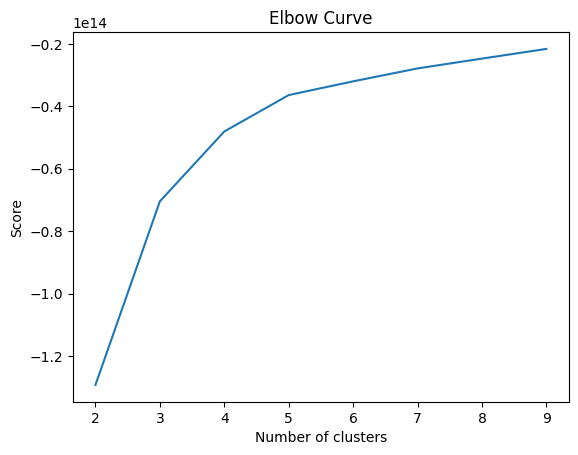

In [23]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

def find_optimal_clusters(data):
    # Number of clusters
    k = range(2, 10)
    km = [KMeans(n_clusters=i) for i in k]
    score = [km[i].fit(data).score(data) for i in range(len(km))]
    
    # Plot the elbow
    plt.plot(k, score)
    plt.xlabel('Number of clusters')
    plt.ylabel('Score')
    plt.title('Elbow Curve')
    plt.show()
    
    # Use knee locator to determine optimal number of clusters
    kn = KneeLocator(k, score, curve='convex', direction='decreasing')
    return kn.knee

# Find optimal number of clusters for your data
optimal_clusters = find_optimal_clusters(df)


In [24]:
optimal_clusters

2

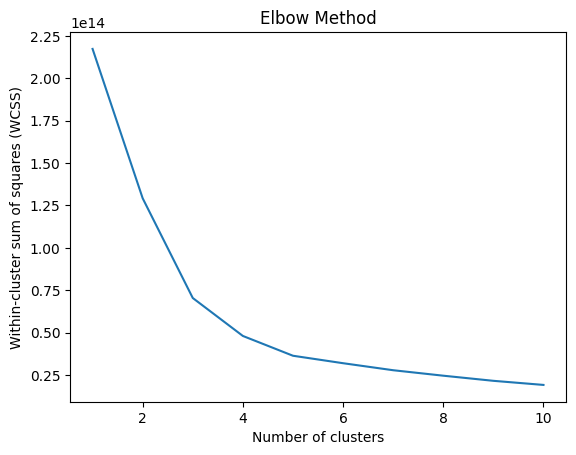

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



# Fit the KMeans model for a range of different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Plot the WCSS versus number of clusters
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Within-cluster sum of squares (WCSS)")
plt.show()


In [26]:
df.dtypes

price_x                       float64
freight_value                 float64
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
diff_days                     float64
price_y                       float64
cluster                         int32
Unnamed: 0                      int64
customer_zip_code_prefix        int64
order_item_id                   int64
review_score                    int64
dummy                           int64
score_freq                      int64
score_rec                       int64
score_montant                   int64
score_rfm                       int64
dtype: object

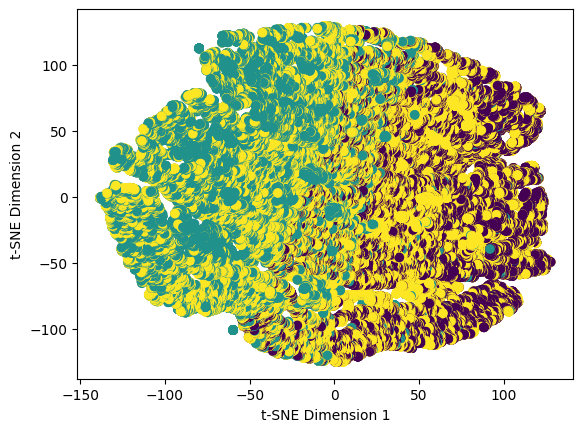

In [27]:
from sklearn.manifold import TSNE

# create the t-SNE object with the desired parameters
tsne = TSNE()

# fit and transform the data
reduced_data = tsne.fit_transform(df)

# plot the transformed data
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df["cluster"], cmap="viridis")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show() 
# T-SNE


c'est pire qu'avant largement 

In [28]:
dfa = pd.read_csv("data_analys.csv")

In [29]:
dfa["dummy"] = 1

In [ ]:
dfa[dfa["order_id_y"].duplicated(keep=False)]

,Unnamed: 0,customer_id,order_approved_at_x,shipping_limit_date_x,review_comment_message,review_answer_timestamp_x,product_category_name,order_item_id_y,order_item_id_y.1,customer_city_y,...,review_score_x.1,date_achat_y,score_rec,review_score_y,review_score_y.1,score,score_montant,score_freq,score_rfm,dummy
0,0,08c5351a6aca1c1589a38f244edeee9d,2016-10-07 13:18:03,2016-10-26 18:25:19,1 mes de atraso na entrega !!! ultima compra q...,2016-11-15 16:00:34,moveis_decoracao,3,3,boa vista,...,1,2016-09-04,1,2,2,3,1,1,3,1
1,1,08c5351a6aca1c1589a38f244edeee9d,2016-10-07 13:18:03,2016-10-26 18:25:19,1 mes de atraso na entrega !!! ultima compra q...,2016-11-15 16:00:34,moveis_decoracao,3,3,boa vista,...,1,2016-09-04,1,2,2,3,1,1,3,1
3,3,86dc2ffce2dfff336de2f386a786e574,2016-09-15 12:16:38,2016-09-19 23:11:33,nao recebi o produto e nem resposta da empresa,2016-10-07 18:32:28,beleza_saude,6,6,sao joaquim da barra,...,1,2016-09-15,1,3,3,4,1,1,3,1
4,4,86dc2ffce2dfff336de2f386a786e574,2016-09-15 12:16:38,2016-09-19 23:11:33,nao recebi o produto e nem resposta da empresa,2016-10-07 18:32:28,beleza_saude,6,6,sao joaquim da barra,...,1,2016-09-15,1,3,3,4,1,1,3,1
5,5,86dc2ffce2dfff336de2f386a786e574,2016-09-15 12:16:38,2016-09-19 23:11:33,nao recebi o produto e nem resposta da empresa,2016-10-07 18:32:28,beleza_saude,6,6,sao joaquim da barra,...,1,2016-09-15,1,3,3,4,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112364,112364,448945bc713d98b6726e82eda6249b9e,2018-08-29 09:04:10,2018-09-06 09:04:10,NaN,2018-09-01 16:57:41,beleza_saude,15,15,sao jose dos campos,...,5,2018-08-29,5,25,25,5,5,1,11,1
112367,112367,448945bc713d98b6726e82eda6249b9e,2018-08-29 09:04:10,2018-09-06 09:04:10,NaN,2018-09-01 16:57:41,beleza_saude,15,15,sao jose dos campos,...,5,2018-08-29,5,25,25,5,5,1,11,1
112368,112368,e60df9449653a95af4549bbfcb18a6eb,2018-08-29 14:31:07,2018-08-31 14:30:19,NaN,2018-10-24 16:27:36,moveis_cozinha_area_de_servico_jantar_e_jardim,3,3,curitiba,...,5,2018-08-29,5,10,10,5,5,1,11,1
112369,112369,448945bc713d98b6726e82eda6249b9e,2018-08-29 09:04:10,2018-09-06 09:04:10,NaN,2018-09-01 16:57:41,beleza_saude,15,15,sao jose dos campos,...,5,2018-08-29,5,25,25,5,5,1,11,1


au moment du merge , enlever les doublons 